# <center> Steam Games Dataset </center>
<center> Author: Tudor Morariu </center>

## Procesarea si Citirea datelor

In [72]:
import pandas as pd
pd.set_option('display.max_columns', None)

data = pd.read_csv("./games.csv");

#data = data.head(10000);

data.drop(columns=["AppID"], inplace=True);
data.drop(columns=["Supported languages", "Full audio languages", 
"Header image", "Website", 
"Support url", "Support email", 
"Notes", "Developers", 
"Publishers", "Categories",
"Tags", "Screenshots", 
"Movies", "Metacritic url",
"Reviews"], inplace=True);

display(data);

,Name,Release date,Estimated owners,Peak CCU,Required age,Price,DLC count,About the game,Windows,Mac,Linux,Metacritic score,User score,Positive,Negative,Score rank,Achievements,Recommendations,Average playtime forever,Average playtime two weeks,Median playtime forever,Median playtime two weeks,Genres
0,Galactic Bowling,"Oct 21, 2008",0 - 20000,0,0,19.99,0,Galactic Bowling is an exaggerated and stylize...,True,False,False,0,0,6,11,NaN,30,0,0,0,0,0,"Casual,Indie,Sports"
1,Train Bandit,"Oct 12, 2017",0 - 20000,0,0,0.99,0,THE LAW!! Looks to be a showdown atop a train....,True,True,False,0,0,53,5,NaN,12,0,0,0,0,0,"Action,Indie"
2,Jolt Project,"Nov 17, 2021",0 - 20000,0,0,4.99,0,Jolt Project: The army now has a new robotics ...,True,False,False,0,0,0,0,NaN,0,0,0,0,0,0,"Action,Adventure,Indie,Strategy"
3,Henosis™,"Jul 23, 2020",0 - 20000,0,0,5.99,0,HENOSIS™ is a mysterious 2D Platform Puzzler w...,True,True,True,0,0,3,0,NaN,0,0,0,0,0,0,"Adventure,Casual,Indie"
4,Two Weeks in Painland,"Feb 3, 2020",0 - 20000,0,0,0.00,0,ABOUT THE GAME Play as a hacker who has arrang...,True,True,False,0,0,50,8,NaN,17,0,0,0,0,0,"Adventure,Indie"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85098,Mannerheim's Saloon Car,"Jan 2, 2024",0 - 0,0,0,0.00,0,Marshal Mannerheim’s Saloon Car is the train c...,True,False,False,0,0,0,0,NaN,0,0,0,0,0,0,"Adventure,Simulation"
85099,Beer Run,"Jan 3, 2024",0 - 0,0,0,0.00,0,Beer Run is an Indie game created to steal bee...,True,False,False,0,0,0,0,NaN,0,0,0,0,0,0,"Casual,Indie"
85100,My Friend The Spider,"Jan 4, 2024",0 - 0,0,0,0.00,0,A small 'horror' narrative game about isolatio...,True,False,False,0,0,0,0,NaN,0,0,0,0,0,0,"Adventure,Simulation"
85101,Path of Survivors,"Jan 8, 2024",0 - 0,0,0,3.99,0,Path of Survivors is a multi-class auto-battle...,True,False,False,0,0,0,0,NaN,34,0,0,0,0,0,"Action,Casual,Indie,RPG,Simulation"


*   **Obs:** Exista cateva date *NaN*. Acestea trebuie umplute cu ceva ce nu va influenta modelul.
*   **Obs:** Cateava coloane sunt inutile precum: *AppID*, coloanele cu linkuri si limbi(pentru inceput).

### Feature Engeneering

Multe dintre coloane sunt string-uri. Trebuie sa le trainsform intr-un numar sau in niste coloane aditionale.

Transormarile pe care le voi face sunt:

1.  Voi pune in loc de *Relese Date*: anul, luna si ziua pe alte $3$ coloane.

2.  In loc de *Estimated owners* voi pune media celor doua numere din celula.

3.  Voi pune in loc de *About the game* jocului lungime string-ului corespunzator.

4.  La coloanele care contin review-uri voi umple NaN cu $0$.

5.  In loc de *Genres* voi asigna fiecarui "tip" un numar in functie de popularitate.

In [73]:
# Date luate de pe https://steamdb.info/tags/
genra_map = { 
    "Indie": 86550,
    "Action": 71607,
    "Casual": 63113,
    "Adventure": 61680,
    "Strategy": 36717,
    "Sports": 8325,
    "0": 10000,
    "Sexual Content": 11447,
    "Video Production": 892,
    "Early Access": 15067,
    "Utilities": 3102,
    "Simulation": 39941,
    "Education": 4596,
    "Violent": 10186,
    "Gore": 8101,
    "Web Publishing": 2628,
    "Animation & Modeling": 1384,
    "Nudity": 11217,
    "Audio Production": 913,
    "Design & Illustration": 4170,
    "Photo Editing": 482,
    "Software Training": 719,
    "Free to Play": 16295,
    "Massively Multiplayer": 5936,
    "Racing": 7009,
    "RPG": 37058,
    "Game Development": 1643,
    "Accounting": 1000,
    "Movie": 1580,
    "Documentary": 207,
    "Episodic": 593,
    "Short": 2286,
    "Tutorial": 2348,
    "360 Video": 314
}



In [74]:
from datetime import datetime

generas = [];
data.fillna(0, inplace=True);


def transform_row_date(row):
    str_date = row["Release date"];

    date_format_1 = "%b %d, %Y"
    date_format_2 = "%b %Y";
    try:
        date_object = datetime.strptime(str_date, date_format_1)
    except ValueError:
        date_object = datetime.strptime(str_date, date_format_2)

    row["Release year"] = date_object.year;
    row["Release month"] = date_object.month;
    row["Release day"] = date_object.day;

    return row;

def transform_row_owners(row):
    str_owners = row["Estimated owners"];

    owners_number_1 = int(str_owners.split('-')[0].strip());
    owners_number_2 = int(str_owners.split('-')[1].strip());
    
    row["owners avg"] = (owners_number_1 + owners_number_2) / 2;

    return row;

def transform_row_descrip(row):
    str_des = str(row["About the game"]);
    
    row["descr len"] = len(str_des.split(' '));

    return row;

def transform_row_genra(row):
    str_gen = str(row["Genres"]);

    sum_sores = 0;
    number_of_gen = 0;

    for gr in str_gen.split(','):
        sum_sores += genra_map[gr];
        number_of_gen += 1;

    return row;

def transform_true_false(cols):
    for col in cols:
        
        data[col] = data[col].apply(lambda x: 1 if x == "True" else 0);

def remove_processed_cols(cols):
    data.drop(columns=cols, inplace=True);


data = data.apply(transform_row_date, axis=1);
data = data.apply(transform_row_owners, axis=1);
data = data.apply(transform_row_descrip, axis=1);
data = data.apply(transform_row_genra, axis=1);

#transform_true_false(["Windows", "Mac", "Linux"])
remove_processed_cols(["Name", "Release date", "Estimated owners", "About the game", "Genres"])


display(data); 


,Peak CCU,Required age,Price,DLC count,Windows,Mac,Linux,Metacritic score,User score,Positive,Negative,Score rank,Achievements,Recommendations,Average playtime forever,Average playtime two weeks,Median playtime forever,Median playtime two weeks,Release year,Release month,Release day,owners avg,descr len
0,0,0,19.99,0,True,False,False,0,0,6,11,0.0,30,0,0,0,0,0,2008,10,21,10000.0,158
1,0,0,0.99,0,True,True,False,0,0,53,5,0.0,12,0,0,0,0,0,2017,10,12,10000.0,87
2,0,0,4.99,0,True,False,False,0,0,0,0,0.0,0,0,0,0,0,0,2021,11,17,10000.0,111
3,0,0,5.99,0,True,True,True,0,0,3,0,0.0,0,0,0,0,0,0,2020,7,23,10000.0,92
4,0,0,0.00,0,True,True,False,0,0,50,8,0.0,17,0,0,0,0,0,2020,2,3,10000.0,115
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85098,0,0,0.00,0,True,False,False,0,0,0,0,0.0,0,0,0,0,0,0,2024,1,2,0.0,156
85099,0,0,0.00,0,True,False,False,0,0,0,0,0.0,0,0,0,0,0,0,2024,1,3,0.0,126
85100,0,0,0.00,0,True,False,False,0,0,0,0,0.0,0,0,0,0,0,0,2024,1,4,0.0,216
85101,0,0,3.99,0,True,False,False,0,0,0,0,0.0,34,0,0,0,0,0,2024,1,8,0.0,103


In [75]:
display(data.describe())

,Peak CCU,Required age,Price,DLC count,Metacritic score,User score,Positive,Negative,Score rank,Achievements,Recommendations,Average playtime forever,Average playtime two weeks,Median playtime forever,Median playtime two weeks,Release year,Release month,Release day,owners avg,descr len
count,85103.000000,85103.000000,85103.000000,85103.000000,85103.000000,85103.000000,8.510300e+04,85103.000000,85103.000000,85103.000000,8.510300e+04,85103.000000,85103.000000,85103.000000,85103.000000,85103.000000,85103.000000,85103.000000,8.510300e+04,85103.000000
mean,134.872930,0.312774,7.193703,0.543412,3.348366,0.039822,9.585609e+02,159.772570,0.051138,19.859394,7.755176e+02,104.729681,10.680105,93.316029,11.467328,2019.802921,6.789197,15.946430,8.589215e+04,200.457375
std,5403.548851,2.254721,12.362478,13.721223,15.421471,1.791013,2.435920e+04,4574.583903,2.248518,171.446874,1.789338e+04,1142.447517,188.840006,1510.732101,205.372944,2.894896,3.423632,8.884576,1.027754e+06,163.562365
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,1997.000000,1.000000,1.000000,0.000000e+00,1.000000
25%,0.000000,0.000000,0.990000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,2018.000000,4.000000,8.000000,1.000000e+04,101.000000
50%,0.000000,0.000000,4.490000,0.000000,0.000000,0.000000,7.000000e+00,2.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,2020.000000,7.000000,16.000000,1.000000e+04,164.000000
75%,1.000000,0.000000,9.990000,0.000000,0.000000,0.000000,4.500000e+01,14.000000,0.000000,18.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,2022.000000,10.000000,24.000000,1.000000e+04,257.000000
max,872138.000000,21.000000,999.980000,2366.000000,97.000000,100.000000,5.764420e+06,895978.000000,100.000000,9821.000000,3.441592e+06,145727.000000,19159.000000,208473.000000,19159.000000,2025.000000,12.000000,31.000000,1.500000e+08,4355.000000


### Normalizarea Datelor

In [76]:
data.dropna(inplace=True);

for column in data.columns: 
    try: 
        data[column] = data[column]  / data[column].abs().max() 
    except NotImplementedError:
        pass;
preturi = data["Price"].values;
preturi.sort()

pret_map = {}
clasa = 1;

for pret in preturi:
    if(pret not in pret_map): 
        pret_map[pret] = clasa;
        clasa += 1;

print(pret_map)


{0.0: 1, 0.0002900058001160023: 2, 0.00035000700014000275: 3, 0.00037000740014800295: 4, 0.0004400088001760035: 5, 0.0004900098001960039: 6, 0.000500010000200004: 7, 0.0005100102002040041: 8, 0.0005200104002080042: 9, 0.0005300106002120043: 10, 0.0005400108002160043: 11, 0.0005500110002200045: 12, 0.0005600112002240045: 13, 0.0005700114002280045: 14, 0.0005900118002360047: 15, 0.0006000120002400048: 16, 0.0006100122002440048: 17, 0.000630012600252005: 18, 0.0006400128002560051: 19, 0.0006500130002600052: 20, 0.0006600132002640053: 21, 0.0006700134002680054: 22, 0.0006900138002760055: 23, 0.0007100142002840057: 24, 0.0007200144002880057: 25, 0.0007300146002920058: 26, 0.0007400148002960059: 27, 0.000750015000300006: 28, 0.0007600152003040061: 29, 0.0007700154003080061: 30, 0.0007900158003160063: 31, 0.0008100162003240065: 32, 0.0008200164003280065: 33, 0.0008400168003360066: 34, 0.000870017400348007: 35, 0.000880017600352007: 36, 0.0008900178003560072: 37, 0.0009000180003600072: 38, 0.0

### Matricea de Corelatie

<AxesSubplot:>

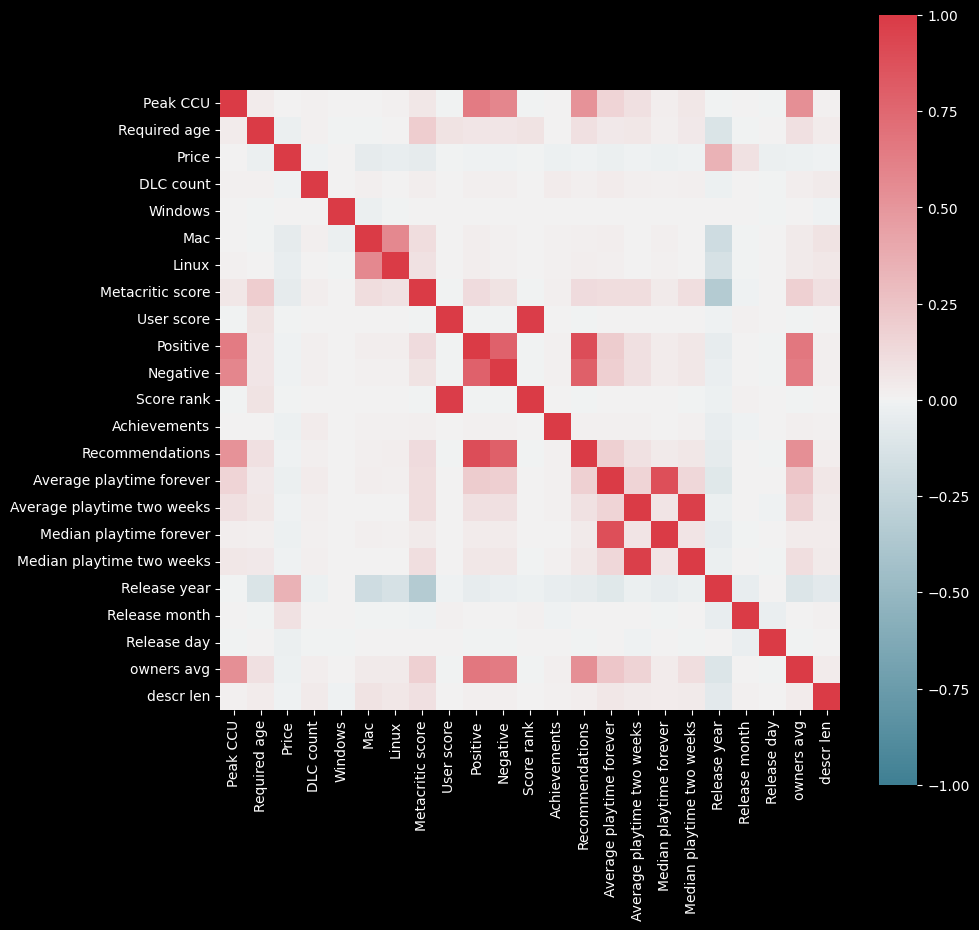

In [77]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('dark_background')


f, ax = plt.subplots(figsize=(10, 10))
corr = data.corr()
sns.heatmap(corr, cmap=sns.diverging_palette(220, 10, as_cmap=True), vmin=-1.0, vmax=1.0, square=True, ax=ax)

*   **Obs:** Exista cateva corelatii puternice.

### Plot PCA 2D

Chiar daca prolema nu este o problema de clasificare cu *PCA* ar trebui sa observam un "trend" astfel cu *LinearRegression* sau cu un *NN* sa putem determina pretul.

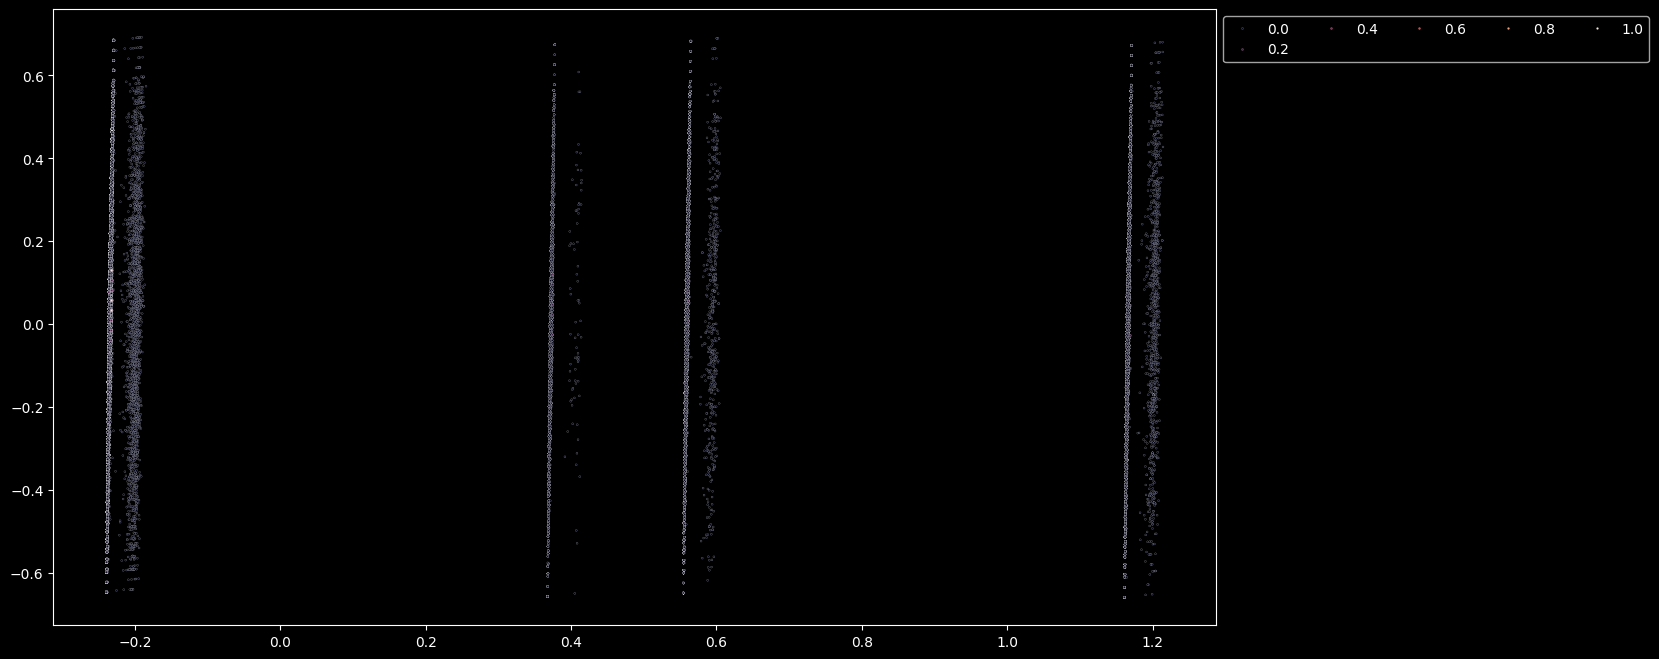

In [78]:
from sklearn.decomposition import PCA

pca2d = PCA(n_components=2);

points = pca2d.fit_transform(data.drop(columns=["Price"]));

plt.figure(figsize=(15,8))

ax = sns.scatterplot(
    x=points[:, 0], 
    y=points[:, 1], 
    s=2, 
    hue=data["Price"].values, 
    palette=sns.color_palette("rocket", as_cmap=True, n_colors=30), 
    data=data.drop(columns=["Price"]),
);
plt.legend(ncol=5, bbox_to_anchor=(1, 1))


### Plot PCA 3D

In [ ]:
pca3d = PCA(n_components=3);

points = pca3d.fit_transform(data.drop(columns=["Price"]));
print(points)

ax1 = plt.figure(figsize=(5, 5)).add_subplot(projection='3d')
ax2 = plt.figure(figsize=(5, 5)).add_subplot(projection='3d')
ax3 = plt.figure(figsize=(5, 5)).add_subplot(projection='3d')
ax4 = plt.figure(figsize=(5, 5)).add_subplot(projection='3d')


ax1.view_init(0, 180);
ax2.view_init(90, 0);
ax3.view_init(90, 90);
ax4.view_init(45, 45);


ax1.set_title("Plot PCA 3D (0, 180)");
ax2.set_title("Plot PCA 3D (90, 0)");
ax3.set_title("Plot PCA 3D (90, 90)");
ax4.set_title("Plot PCA 3D (45, 45)");


ax1.scatter(points[:, 0],
           points[:, 1],
           points[:, 2],
           c=data["Price"])


ax2.scatter(points[:, 0],
           points[:, 1],
           points[:, 2],
           c=data["Price"])


ax3.scatter(points[:, 0],
           points[:, 1],
           points[:, 2],
           c=data["Price"])


ax4.scatter(points[:, 0],
           points[:, 1],
           points[:, 2],
           c=data["Price"])

#### Codul de mai sus nu produce graficele de mai jos. Dimensiunea figurilor este diferita (5 in loc de 30).

<img title="3D PCA plot" src="./plot3D_1_zoomed_in.png" width="450">
<img title="3D PCA plot" src="./plot3D_2_zoomed_in.png" width="450">
<img title="3D PCA plot" src="./plot3D_3_zoomed_in.png" width="450">
<img title="3D PCA plot" src="./plot3D_4_zoomed_in.png" width="450">



*   **Obs:** Obsev ca datele sunt in "grupusoare" de cateva puncte. Presupun ca aceste grupuri is preturile diferite (care sunt in jur de $500$).

## Train-Test Split

In [80]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(data, test_size=0.3);

## Selectia si Pregatirea Modelelor

Pentru modele o sa incerc:

1. *MLPClassifier*: Pe graficele de mai sus datele sunt asezate in "grupuri" care cred ca sunt preturile.
2. *Random Decision Forest*: Similar cu *MLPClassifier*, pretul poate fi determinat de un set de reguli.
3. *LinearRegression*: Chiar daca datele nu sunt dispuse pe o functie voi incerca oricum.
    1. *Sklearn Regression*
    2. *XGBRegressor*
4. *Keras Neural Network* 

### MLPClassifier

In [ ]:
from sklearn.neural_network import MLPClassifier

model = MLPClassifier(max_iter=100, verbose=1, batch_size=1024);

train_features = train.drop(columns=["Price", "Recommendations", "descr len"]);
train_labels = train["Price"].map(pret_map);


test_features = test.drop(columns=["Price", "Recommendations", "descr len"]);
test_labels = test["Price"].map(pret_map);

model.fit(train_features, train_labels);

In [87]:
print("Scor: %.4f" % model.score(test_features, test_labels))

Scor: 0.2037


### Random Decision Trees

In [96]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(max_depth=10000);

train_features = train.drop(columns=["Price", "Recommendations", "descr len"]);
train_labels = train["Price"].map(pret_map);


test_features = test.drop(columns=["Price", "Recommendations", "descr len"]);
test_labels = test["Price"].map(pret_map);

model.fit(train_features, train_labels);

In [97]:
print("Scor: %.4f" % model.score(test_features, test_labels))

Scor: 0.3444


### Liner Regression

#### Sklearn

In [88]:
from sklearn.linear_model import LinearRegression

model = LinearRegression();

train_features = train.drop(columns=["Price", "Recommendations", "descr len"]);
train_labels = train["Price"];

test_features = test.drop(columns=["Price", "Recommendations", "descr len"]);
test_labels = test["Price"];

model.fit(train_features, train_labels);

In [90]:
print("Scor: %.4f" % model.score(test_features, test_labels));

Scor: 0.1731


#### XGBRegressor

In [94]:
import xgboost
from sklearn.metrics import r2_score

model = xgboost.XGBRegressor()

train_features = train.drop(columns=["Price", "Recommendations", "descr len"]);
train_labels = train["Price"];

test_features = test.drop(columns=["Price", "Recommendations", "descr len"]);
test_labels = test["Price"];

model.fit(train_features, train_labels);

print("Scor: %.4f" %r2_score(test_labels, model.predict(test_features)))

Scor: 0.5205


### Keras Neural Network

In [102]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import LeakyReLU
from tensorflow.keras.utils import plot_model
from tensorflow.keras.layers import LSTM

import keras

model = Sequential()

model.add(Dense(2, input_shape=(20,), activation="relu"))
model.add(Dense(2, activation="relu"))
model.add(Dense(1))

opt = keras.optimizers.SGD(learning_rate=0.001)

model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

plot_model(model, to_file="model.png", show_shapes=True)

model.summary()


train_features = train.drop(columns=["Price", "Recommendations", "descr len"]);
train_labels = train["Price"];

test_features = test.drop(columns=["Price", "Recommendations", "descr len"]);
test_labels = test["Price"];

model.fit(train_features, train_labels, validation_data=(test_features, test_labels), epochs=200, batch_size=1024, verbose=0)

/Users/tudor/Documents/Work AI/.venv/lib/python3.9/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_27"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_77 (Dense)                │ (None, 2)              │            42 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_78 (Dense)                │ (None, 2)              │             6 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_79 (Dense)                │ (None, 1)              │             3 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 51 (204.00 B)

 Trainable params: 51 (204.00 B)

 Non-trainable params: 0 (0.00 B)

/Users/tudor/Documents/Work AI/.venv/lib/python3.9/site-packages/keras/src/losses/losses.py:22: SyntaxWarning: In loss categorical_crossentropy, expected y_pred.shape to be (batch_size, num_classes) with num_classes > 1. Received: y_pred.shape=(None, 1). Consider using 'binary_crossentropy' if you only have 2 classes.
  return self.fn(y_true, y_pred, **self._fn_kwargs)
/Users/tudor/Documents/Work AI/.venv/lib/python3.9/site-packages/keras/src/losses/losses.py:22: SyntaxWarning: In loss categorical_crossentropy, expected y_pred.shape to be (batch_size, num_classes) with num_classes > 1. Received: y_pred.shape=(None, 1). Consider using 'binary_crossentropy' if you only have 2 classes.
  return self.fn(y_true, y_pred, **self._fn_kwargs)


In [107]:
print("Scor: %.4f" % r2_score(test_labels, model.predict(test_features)))

798/798 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


ValueError: Input contains NaN.

## Performanta Modelelor incercate


<table>
  <tr>
    <th>Model</th>
    <th>Scor</th>
    <th>Note</th>
  </tr>
  <tr>
    <td>MLPClassifier</td>
    <td>0.2037</td>
    <td>Training incet datorita numarului mare de output-uri</td>
  </tr>
  <tr>
    <td>Sklearn Regressor</td>
    <td>0.1731</td>
    <td>Scor de asteptat mic, datele nu sunt grupate de-a lungul unei functii</td>
  </tr>
  <tr>
    <td>XGBRegressor</td>
    <td>0.5205</td>
    <td>Similar cu cealalta regresie</td>
  </tr>
  <tr>
    <td>Random Decision Trees (adancimea maxima 10000)</td>
    <td>0.3444</td>
    <td>Scor mic din cauza numarului mare de grupuri. Adancimea ar trebui sa fie imensa.</td>
  </tr>
  <tr>
    <td>Keras Neural Network</td>
    <td>-64.0966</td>
    <td>Facut amatoresc :(.</td>
  </tr>
</table>

## Concluzii

1. Datasetul este sintetic. Se observza din ploturile prea "perfecte"
2. Folosind algoritmii "clasici" nu pot otine un scor bun, cel mai mare fiind $0.16$

## Imbunatatiri Ulterioare

1. Feature Engeneering. Din Titlu si descrierea jocului se pot extrage date estentiale pentru obtinerea unui scor mai bun.
2. Construirea unu Neural Network mai bun.
3. Adaugare de *One-Hot Encoding* pentru limbile valabile sau pentru genre-urile jocurilor.